In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('insurance_part2_data.csv')

In [3]:
df.head(5)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [5]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


## Checking missing values and duplicate records in the dataset

In [6]:
df.isnull().sum().sum()

0

In [7]:
columns = [i for i in df.columns]
for i in columns:
    if '?' in df[i]:
        print("missing values is present in {}".format(i))
    else:
        print("{} has no missing values".format(i))

Age has no missing values
Agency_Code has no missing values
Type has no missing values
Claimed has no missing values
Commision has no missing values
Channel has no missing values
Duration has no missing values
Sales has no missing values
Product Name has no missing values
Destination has no missing values


In [8]:
df.duplicated().sum()

139

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

## Changing Object data into int data type

In [11]:
for i in list(df):
    if df[i].dtype == 'object':
        df[i] = pd.Categorical(df[i]).codes

## checking outliers present in the dataset

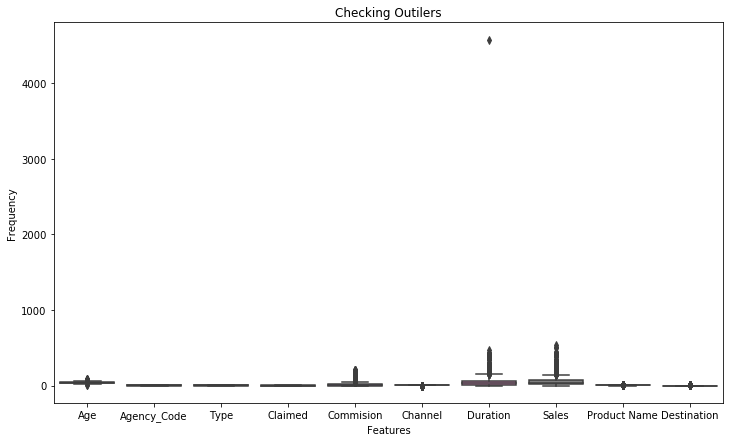

In [12]:
plt.figure(figsize=(12,7));
sns.boxplot(data=df);
plt.title('Checking Outilers');
plt.xlabel('Features');
plt.ylabel('Frequency');

## Outlier Treatment

In [13]:
def remove_outliers(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3 - Q1
    return (Q1 - 1.5*IQR), (Q3 + 1.5*IQR)

In [14]:
for i in list(df):
    if df[i].dtype != 'object':
        ll, ul = remove_outliers(df[i])
        df[i] = np.where(df[i] < ll, ll, df[i])
        df[i] = np.where(df[i] > ul, ul, df[i])

## Again checking outliers present in the dataset

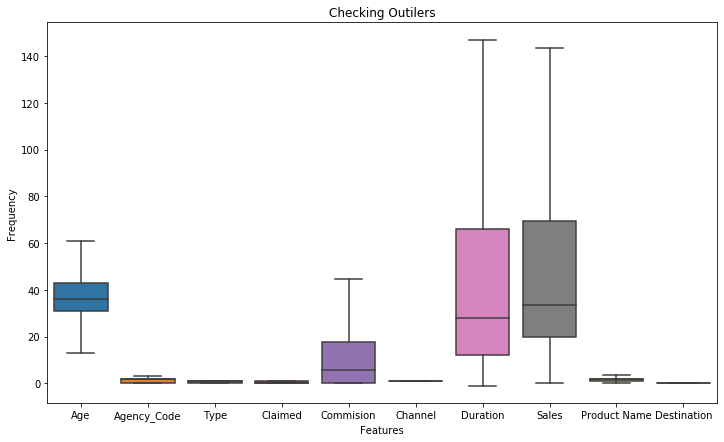

In [15]:
plt.figure(figsize=(12,7));
sns.boxplot(data=df);
plt.title('Checking Outilers');
plt.xlabel('Features');
plt.ylabel('Frequency');

## spliting data in form of Dependent and Independent variable

In [16]:
X = df.drop('Claimed', axis=1)
y = df.Claimed

## scaling features 

In [17]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(X)
scaled_data = pd.DataFrame(scaled_data, columns=list(X))

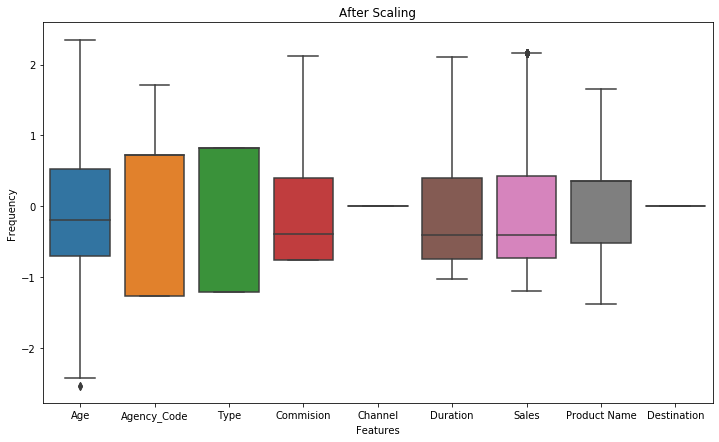

In [18]:
plt.figure(figsize=(12,7));
sns.boxplot(data=scaled_data);
plt.title('After Scaling');
plt.xlabel('Features');
plt.ylabel('Frequency');

## Performing more EDA

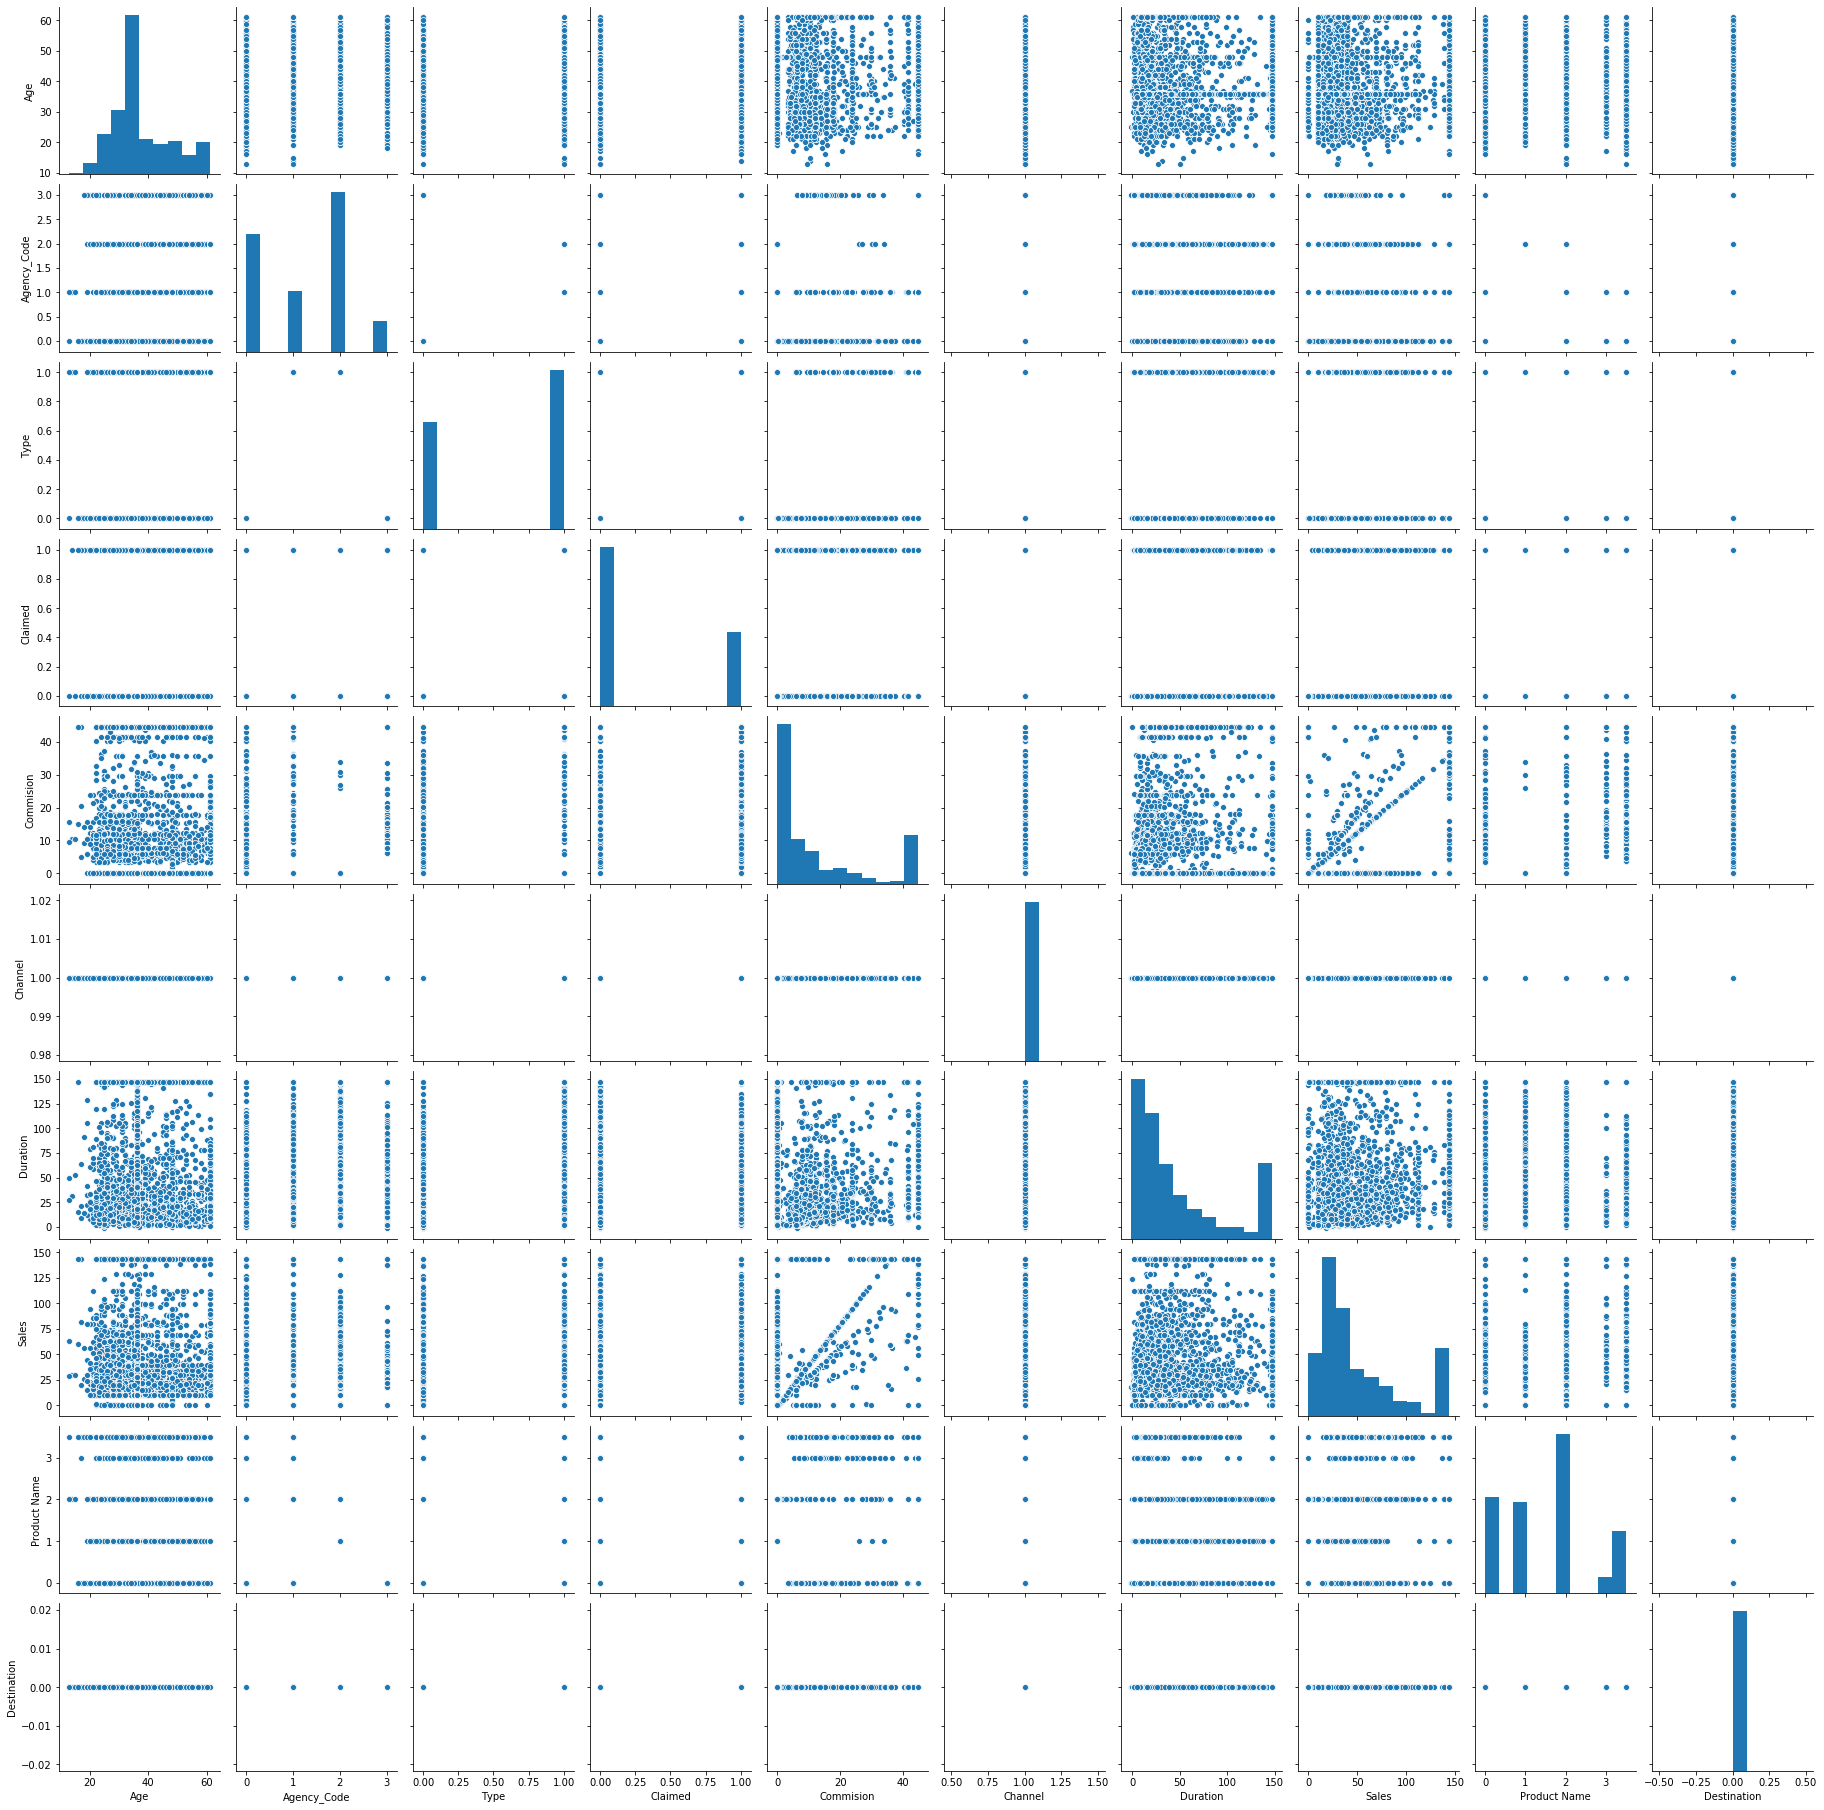

In [19]:
sns.pairplot(df);

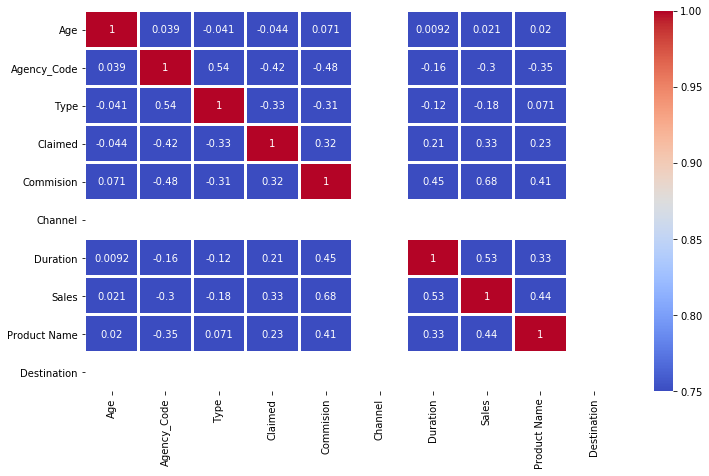

In [20]:
plt.figure(figsize=(12,7));
sns.heatmap(df.corr(), vmin=0.75, vmax=1, annot=True, cmap='coolwarm', lw=2);

### There is no significant relationship present in between different features.

## Model Fitting

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.30, random_state=40)

In [23]:
model = DecisionTreeClassifier(random_state=40)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=40)

In [24]:
predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

In [25]:
print('Model Evaluation on Training Set\n')
print(classification_report(y_train, predict_train))

Model Evaluation on Training Set

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1381
         1.0       0.99      0.97      0.98       621

    accuracy                           0.99      2002
   macro avg       0.99      0.98      0.98      2002
weighted avg       0.99      0.99      0.99      2002



In [26]:
print('Model Evaluation on Test Set\n')
print(classification_report(y_test, predict_test))

Model Evaluation on Test Set

              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76       566
         1.0       0.53      0.51      0.52       293

    accuracy                           0.68       859
   macro avg       0.64      0.64      0.64       859
weighted avg       0.68      0.68      0.68       859



### Therefore, our model is performing overfitting that is performs well on training set but mesirable on test set.
### Also, the model is not valid because the difference in both model accuracy and other params is greater than 5%.

## Will perform parameters tuning

In [27]:
model = DecisionTreeClassifier()

In [28]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [7, 10, 15],
    'min_samples_split': [8, 10, 20],
    'min_samples_leaf': [8, 10, 20],
    'max_leaf_nodes': [7, 10, 15]
}
grid_search = GridSearchCV(model, params, cv=3)

In [29]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 10, 15],
                         'max_leaf_nodes': [7, 10, 15],
                         'min_samples_leaf': [8, 10, 20],
                         'min_samples_split': [8, 10, 20]})

In [30]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=10, min_samples_leaf=8,
                       min_samples_split=8)

In [31]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8}

In [32]:
model = grid_search.best_estimator_

In [33]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=10, min_samples_leaf=8,
                       min_samples_split=8)

In [34]:
predict_training_set = model.predict(x_train)
predict_test_set = model.predict(x_test)

In [35]:
print('Model Evaluation on Training Set\n')
print(classification_report(y_train, predict_training_set))

Model Evaluation on Training Set

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      1381
         1.0       0.67      0.62      0.64       621

    accuracy                           0.79      2002
   macro avg       0.75      0.74      0.74      2002
weighted avg       0.78      0.79      0.78      2002



In [36]:
print('Model Evaluation on Test Set\n')
print(classification_report(y_test, predict_test_set))

Model Evaluation on Test Set

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       566
         1.0       0.69      0.61      0.65       293

    accuracy                           0.77       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.77      0.77      0.77       859



### With the help of hyperparameter tuning, we got the valid model and the results looks good on test set as well even precision and f1 score increases slighlty.
### Accuracy on test dataset is 77% which is quite good.